#Abiy

# DATA VISUALIZATION

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
import numpy as np
import pandas as pd
import hvplot.pandas
import os
import json
import requests
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
import sqlalchemy as sql


In [2]:
# Load .env environment variables
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [4]:
# Format current date as ISO format
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-06-05", tz="America/New_York").isoformat()

In [5]:
#Client Portfolio 
# Set the tickers
tickers = ["GOOG","CMG","IBM", "XLB"]

 

In [6]:
#Diversifying portfolio
tickers_2= ["GOOG","CMG","IBM", "XLB","SPY","AGG"]

In [7]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"
data_set= (tickers, timeframe, start_date, end_date)
data_set= (tickers_2, timeframe, start_date, end_date)

In [8]:
# Set the number of years of data to fetch
num_years = 20

lim = 1000
num_days_data_needed = num_years * 252
def format_date_iso(date):
    return pd.Timestamp(date, tz="America/New_York").isoformat()

        
# Get current closing prices of client portfolio
client_prices_df = pd.DataFrame()
# Get current closing prices of optimazed portfolio
prices_df = pd.DataFrame()
# Get closing prices of client portfolio from alpaca
client_prices_df = alpaca.get_barset(tickers,timeframe,start = start_date,end = end_date,limit=lim).df
# Get closing prices of optimazed portfolio from alpaca
prices_df = alpaca.get_barset(tickers_2,timeframe,start = start_date,end = end_date,limit=lim).df
#creating client daily returns dataframe
client_portfolio_dialy_returns=pd.DataFrame()
#creating optimazed daily returns dataframe
portfolio_daily_returns=pd.DataFrame()
#Create optimazed portfolio an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()
#get portfolio daily returns client portfolio
daily_returns_client = client_prices_df.pct_change()
#get portfolio client cumulative portfolio
client_portfolio_cumulative_returns=pd.DataFrame()                                       
portfolio_cumulative_returns=pd.DataFrame()
#Analyzing portfolio cumulative returns
client_portfolio_cumulative_returns=(1 + portfolio_daily_returns).cumprod()                                       
portfolio_cumulative_returns=(1 + portfolio_daily_returns).cumprod()

# Display sample data
client_prices_df.sort_index(inplace=True)
display(client_prices_df.head())
display(prices_df.head())

CMG                                       GOOG  \
                             open      high     low   close  volume     open   
time                                                                           
2019-05-01 00:00:00-04:00  688.86  697.3300  685.40  688.41  377159  1188.05   
2019-05-02 00:00:00-04:00  687.40  708.8585  686.15  707.93  585736  1167.76   
2019-05-03 00:00:00-04:00  707.57  710.9321  703.42  709.21  408668  1173.65   
2019-05-06 00:00:00-04:00  703.23  720.0000  702.90  716.68  448007  1166.26   
2019-05-07 00:00:00-04:00  716.63  721.4200  702.10  706.37  396476  1180.47   

                                                                      IBM  \
                                high        low    close   volume    open   
time                                                                        
2019-05-01 00:00:00-04:00  1188.0500  1167.1800  1167.92  2458890  140.55   
2019-05-02 00:00:00-04:00  1174.1895  1155.0018  1162.48  1795505  140.50   
2019-05-03 00:00:00-04:00  1186.8000  1169.0000  1185.56  1768455  139.70   
2019-05-06 00:00:00-04:00  1190.8500  1166.2600  1189.51  1428613  138.30   
2019-05-07 00:00:00-04:00  1190.4400  1161.0400  1174.62  1346224  139.15   

                                                              XLB         \
                             high     low   close   volume   open   high   
time                                                                       
2019-05-01 00:00:00-04:00  141.81  140.17  140.57  2599918  57.53  57.53   
2019-05-02 00:00:00-04:00  141.28  139.41  139.64  2729143  56.14  56.44   
2019-05-03 00:00:00-04:00  141.00  139.63  140.28  1967352  56.23  56.70   
2019-05-06 00:00:00-04:00  140.69  137.90  140.40  2198347  55.32  56.08   
2019-05-07 00:00:00-04:00  139.51  136.19  137.62  4056178  55.33  55.43   

                                                    
                              low  close    volume  
time                                                
2019-05-01 00:00:00-04:00  56.400  56.41   6452315  
2019-05-02 00:00:00-04:00  55.725  56.11  10500422  
2019-05-03 00:00:00-04:00  56.180  56.67   5918612  
2019-05-06 00:00:00-04:00  55.320  55.88  15531266  
2019-05-07 00:00:00-04:00  54.590  54.89   7603725

AGG                                        CMG  \
                             open    high      low    close   volume    open   
time                                                                           
2019-05-01 00:00:00-04:00  108.47  108.76  108.320  108.390  4426906  688.86   
2019-05-02 00:00:00-04:00  108.33  108.33  108.100  108.165  2230918  687.40   
2019-05-03 00:00:00-04:00  108.32  108.42  108.275  108.350  2179061  707.57   
2019-05-06 00:00:00-04:00  108.56  108.57  108.440  108.460  4495020  703.23   
2019-05-07 00:00:00-04:00  108.63  108.70  108.585  108.620  2788574  716.63   

                                                               ...     SPY  \
                               high     low   close    volume  ...    open   
time                                                           ...           
2019-05-01 00:00:00-04:00  697.3300  685.40  688.41  377159.0  ...  294.72   
2019-05-02 00:00:00-04:00  708.8585  686.15  707.93  585736.0  ...  291.68   
2019-05-03 00:00:00-04:00  710.9321  703.42  709.21  408668.0  ...  292.82   
2019-05-06 00:00:00-04:00  720.0000  702.90  716.68  448007.0  ...  289.25   
2019-05-07 00:00:00-04:00  721.4200  702.10  706.37  396476.0  ...  290.15   

                                                                XLB         \
                             high     low   close     volume   open   high   
time                                                                         
2019-05-01 00:00:00-04:00  294.95  291.80  291.84   59432706  57.53  57.53   
2019-05-02 00:00:00-04:00  292.70  289.52  291.27   59209780  56.14  56.44   
2019-05-03 00:00:00-04:00  294.34  292.56  294.02   45416907  56.23  56.70   
2019-05-06 00:00:00-04:00  293.31  288.90  292.87   75426654  55.32  56.08   
2019-05-07 00:00:00-04:00  290.81  285.81  288.04  118960368  55.33  55.43   

                                                    
                              low  close    volume  
time                                                
2019-05-01 00:00:00-04:00  56.400  56.41   6452315  
2019-05-02 00:00:00-04:00  55.725  56.11  10500422  
2019-05-03 00:00:00-04:00  56.180  56.67   5918612  
2019-05-06 00:00:00-04:00  55.320  55.88  15531266  
2019-05-07 00:00:00-04:00  54.590  54.89   7603725  

[5 rows x 30 columns]

In [9]:
#creating an empty for holding the closing prices
client_closing_prices_df = pd.DataFrame()
#usinga for loop, for every tickers list,
#select the close price for each tickers in prices_df for the same ticker value
#That will be equal to closing_prices_df
for ticker in tickers:
    client_closing_prices_df[ticker]= client_prices_df[ticker]['close']
#For the new closing_prices_df DataFrame ,keep only data component
#creating an empty for holding the closing prices optimazed portfolio
closing_prices_df = pd.DataFrame()
#usinga for loop, for every tickers list,
#select the close price for each tickers in prices_df for the same ticker value
#That will be equal to closing_prices_df
for ticker in tickers_2:
    closing_prices_df[ticker]= prices_df[ticker]['close']
#closing_prices_df.set.index = closing_prices_df.index.date
#display the first 5 rows
display(client_closing_prices_df.head())

#closing_prices_df.set.index = closing_prices_df.index.date
#display the first 5 rows
display(closing_prices_df.head())

GOOG     CMG     IBM    XLB
time                                                     
2019-05-01 00:00:00-04:00  1167.92  688.41  140.57  56.41
2019-05-02 00:00:00-04:00  1162.48  707.93  139.64  56.11
2019-05-03 00:00:00-04:00  1185.56  709.21  140.28  56.67
2019-05-06 00:00:00-04:00  1189.51  716.68  140.40  55.88
2019-05-07 00:00:00-04:00  1174.62  706.37  137.62  54.89

GOOG     CMG     IBM    XLB     SPY      AGG
time                                                                      
2019-05-01 00:00:00-04:00  1167.92  688.41  140.57  56.41  291.84  108.390
2019-05-02 00:00:00-04:00  1162.48  707.93  139.64  56.11  291.27  108.165
2019-05-03 00:00:00-04:00  1185.56  709.21  140.28  56.67  294.02  108.350
2019-05-06 00:00:00-04:00  1189.51  716.68  140.40  55.88  292.87  108.460
2019-05-07 00:00:00-04:00  1174.62  706.37  137.62  54.89  288.04  108.620

<AxesSubplot:title={'center':'Closing Prices of Client portfolio with diversifying stocks'}, xlabel='time'>

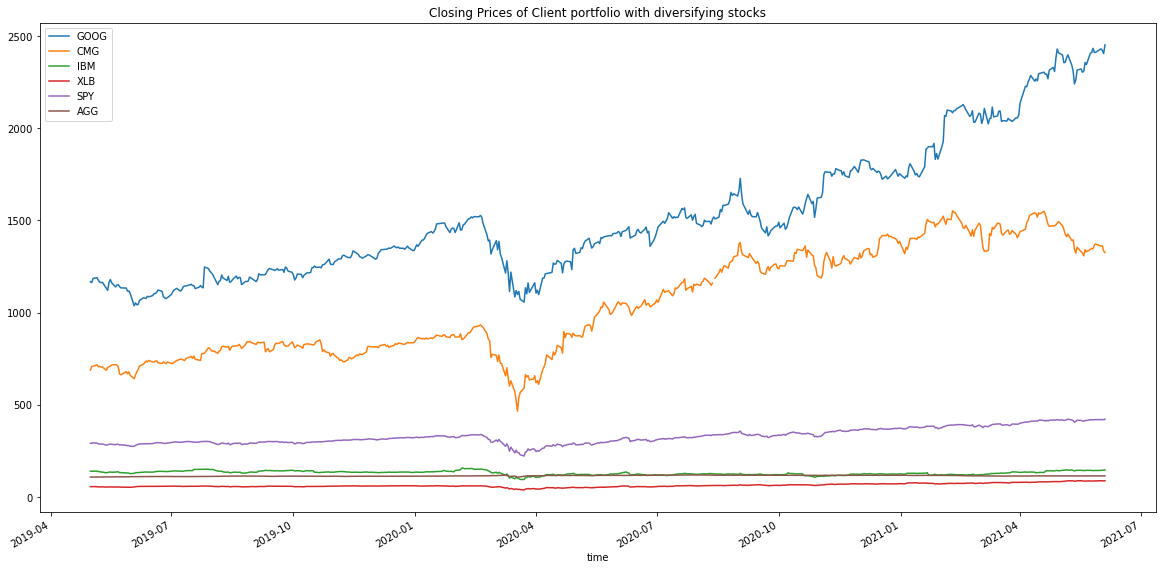

In [10]:
#visualizing the closing_prices_df of optimazed portfolio using plot
closing_prices_df.plot(figsize=(20,10),title='Closing Prices of Client portfolio with diversifying stocks')

In [11]:
# Compute the `client_daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
client_daily_returns= client_closing_prices_df.pct_change().dropna()
client_daily_returns.head()

GOOG       CMG       IBM       XLB
time                                                             
2019-05-02 00:00:00-04:00 -0.004658  0.028355 -0.006616 -0.005318
2019-05-03 00:00:00-04:00  0.019854  0.001808  0.004583  0.009980
2019-05-06 00:00:00-04:00  0.003332  0.010533  0.000855 -0.013940
2019-05-07 00:00:00-04:00 -0.012518 -0.014386 -0.019801 -0.017717
2019-05-08 00:00:00-04:00 -0.007560  0.004530  0.002761 -0.001093

<AxesSubplot:title={'center':'Client Portfolio Daily returns '}, xlabel='time'>

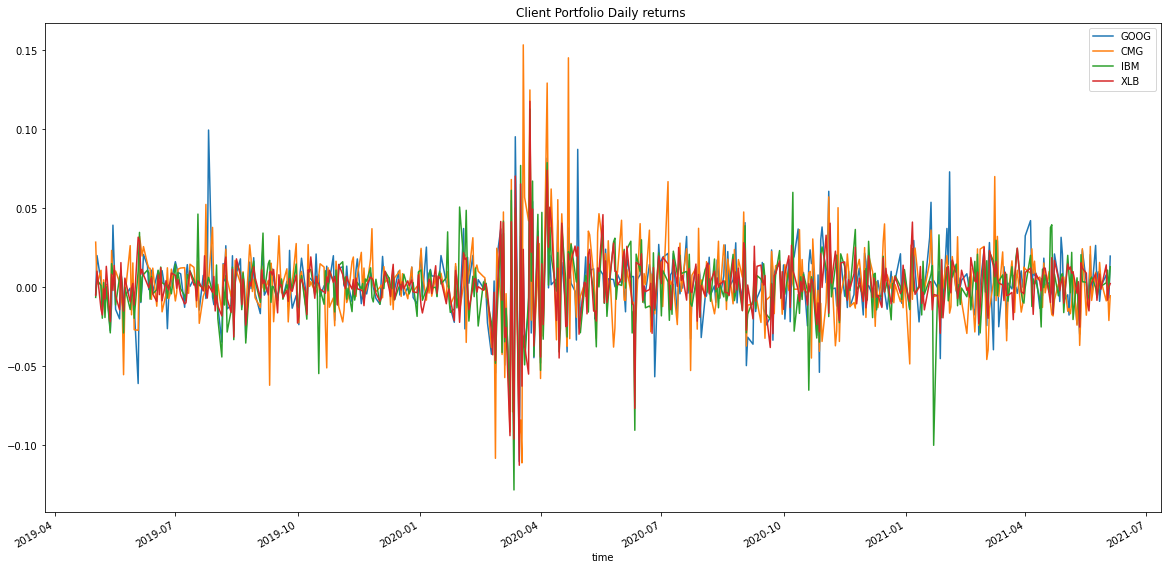

In [12]:
#using Client Portfolio Daily returns stocks plot
client_daily_returns.plot(figsize=(20,10), title= 'Client Portfolio Daily returns ')

<AxesSubplot:title={'center':'client_daily_returns Histogram'}, ylabel='Frequency'>

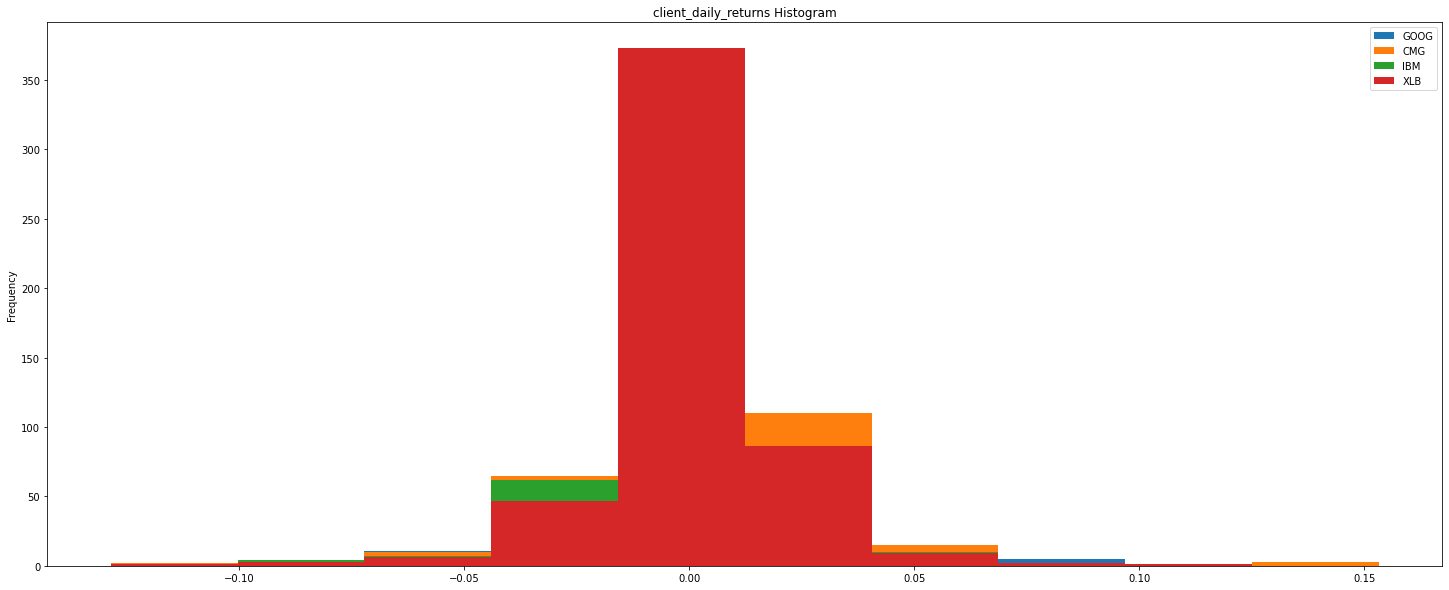

In [13]:
# Visualize distribution of daily returns percent change in closing price using a histogram plot
client_daily_returns.plot.hist(
    figsize=(25,10),
    title='client_daily_returns Histogram'
)

<AxesSubplot:title={'center':'Density Plot for client portfolio '}, ylabel='Density'>

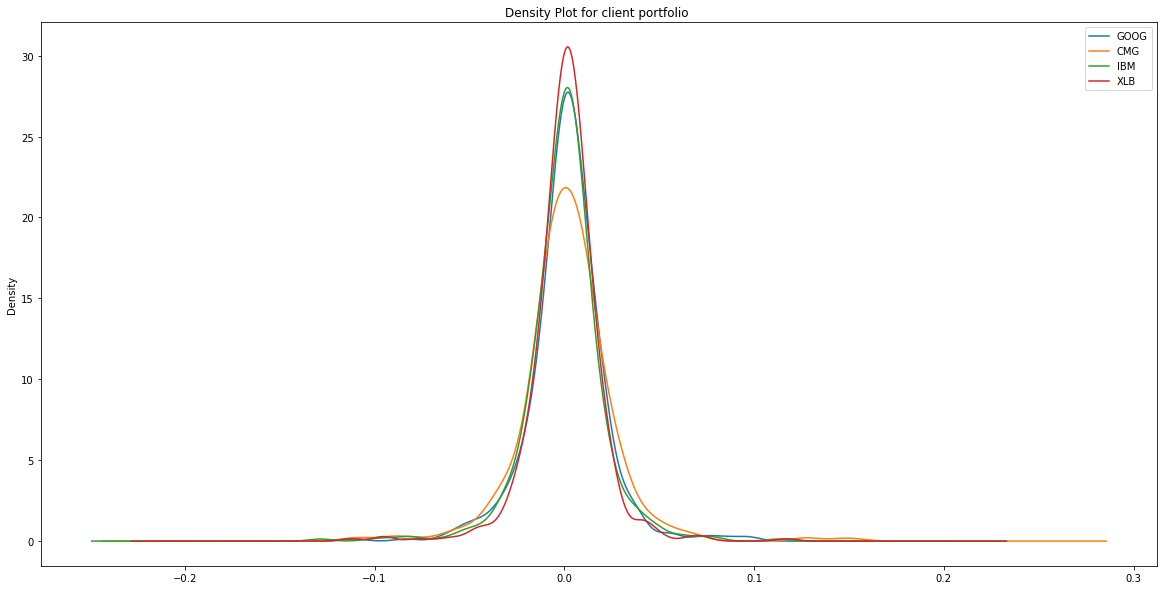

In [14]:
# Visualize the distribution of daily returns data for CMG, GOOG, IBM, XLB, AGG and SPY
# by calling the plot.density function on the daily_returns_df DataFrame.
client_daily_returns.plot.density(figsize=(20,10),title='Density Plot for client portfolio ')

In [15]:
# Generate summary statistics for client portfolio the `daily_returns_df` DataFrame
client_daily_returns.describe()

GOOG         CMG         IBM         XLB
count  528.000000  528.000000  528.000000  528.000000
mean     0.001612    0.001557    0.000303    0.001011
std      0.020318    0.025190    0.020565    0.018425
min     -0.110481   -0.111387   -0.128507   -0.112879
25%     -0.006645   -0.009723   -0.008300   -0.006585
50%      0.001807    0.001527    0.000838    0.001620
75%      0.011031    0.012137    0.009377    0.009544
max      0.099333    0.153257    0.112612    0.117540

In [16]:
#Using the default Pandas plot to visualize the cumulative return values for the client portfolio and diversifying stocks over time. 
#portfolio_cumulative_price = (1+portfolio_daily_returns).cumprod()-1
cpfolio_cumulative_price = (1+client_daily_returns).cumprod()
cpfolio_cumulative_price.head()

GOOG       CMG       IBM       XLB
time                                                             
2019-05-02 00:00:00-04:00  0.995342  1.028355  0.993384  0.994682
2019-05-03 00:00:00-04:00  1.015104  1.030215  0.997937  1.004609
2019-05-06 00:00:00-04:00  1.018486  1.041066  0.998791  0.990605
2019-05-07 00:00:00-04:00  1.005737  1.026089  0.979014  0.973054
2019-05-08 00:00:00-04:00  0.998133  1.030737  0.981717  0.971991

In [17]:
#Client portfolio cumulative price using hvplot function
cpfolio_cumulative_price.hvplot(
    figsize=(20,10),
    xlabel="Date",
    ylabel= "portfolio_cumulative_price",
    title= " Client Portfolio Cumulative Price")


:NdOverlay   [Variable]
   :Curve   [time]   (value)

In [18]:
# Compute the optimazed portfolio `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
op_daily_returns = closing_prices_df.pct_change().dropna()
op_daily_returns.head()

GOOG       CMG       IBM       XLB       SPY  \
time                                                                          
2019-05-02 00:00:00-04:00 -0.004658  0.028355 -0.006616 -0.005318 -0.001953   
2019-05-03 00:00:00-04:00  0.019854  0.001808  0.004583  0.009980  0.009441   
2019-05-06 00:00:00-04:00  0.003332  0.010533  0.000855 -0.013940 -0.003911   
2019-05-07 00:00:00-04:00 -0.012518 -0.014386 -0.019801 -0.017717 -0.016492   
2019-05-08 00:00:00-04:00 -0.007560  0.004530  0.002761 -0.001093 -0.001666   

                                AGG  
time                                 
2019-05-02 00:00:00-04:00 -0.002076  
2019-05-03 00:00:00-04:00  0.001710  
2019-05-06 00:00:00-04:00  0.001015  
2019-05-07 00:00:00-04:00  0.001475  
2019-05-08 00:00:00-04:00 -0.000460

<AxesSubplot:title={'center':'Optimazed Portfolio Daily returns'}, xlabel='time'>

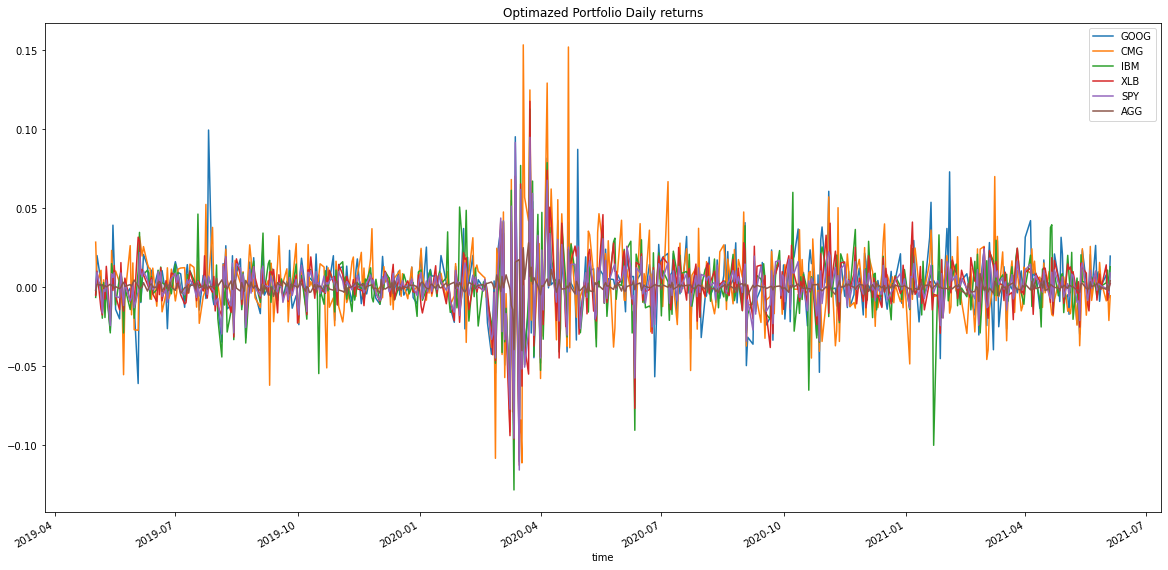

In [19]:
#visualizing optimazed Portfolio Daily returns  plot 
op_daily_returns.plot(figsize=(20,10), title= 'Optimazed Portfolio Daily returns')

<AxesSubplot:title={'center':'Optimazed Daily Retruns Histogram'}, ylabel='Frequency'>

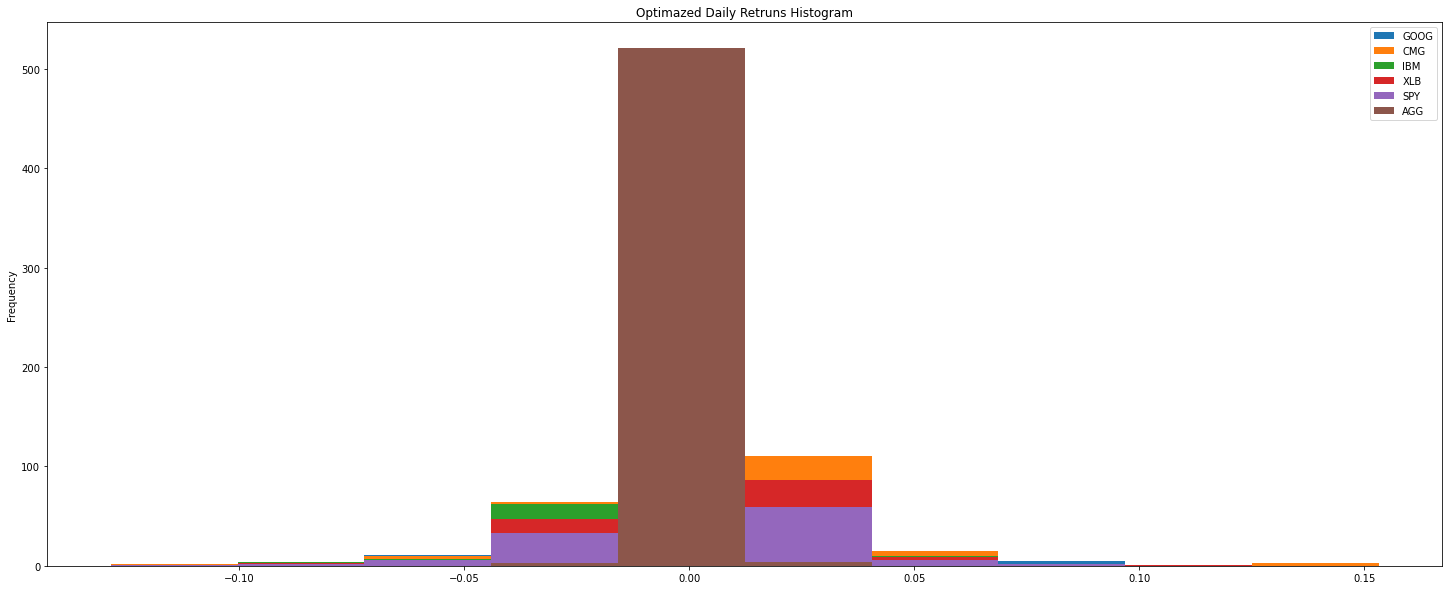

In [20]:
# Visualize distribution of optimazed daily returns percent change in closing price using a histogram plot
op_daily_returns.plot.hist(
    figsize=(25,10),
    title='Optimazed Daily Retruns Histogram'
)

In [21]:
# Generate summary statistics for Optimazed portfolio the `daily_returns_df` DataFrame
op_daily_returns.describe()

GOOG         CMG         IBM         XLB         SPY         AGG
count  528.000000  528.000000  528.000000  528.000000  528.000000  528.000000
mean     0.001612    0.001559    0.000303    0.001011    0.000831    0.000115
std      0.020322    0.025268    0.020565    0.018431    0.016075    0.004101
min     -0.110481   -0.111387   -0.128507   -0.112879   -0.115916   -0.040343
25%     -0.006645   -0.009723   -0.008271   -0.006585   -0.004418   -0.001115
50%      0.001807    0.001527    0.000838    0.001620    0.001521    0.000241
75%      0.010804    0.012137    0.009377    0.009544    0.007580    0.001443
max      0.099333    0.153257    0.112612    0.117540    0.094737    0.027948

<AxesSubplot:title={'center':'Density Plot for Optimazed portfolio '}, ylabel='Density'>

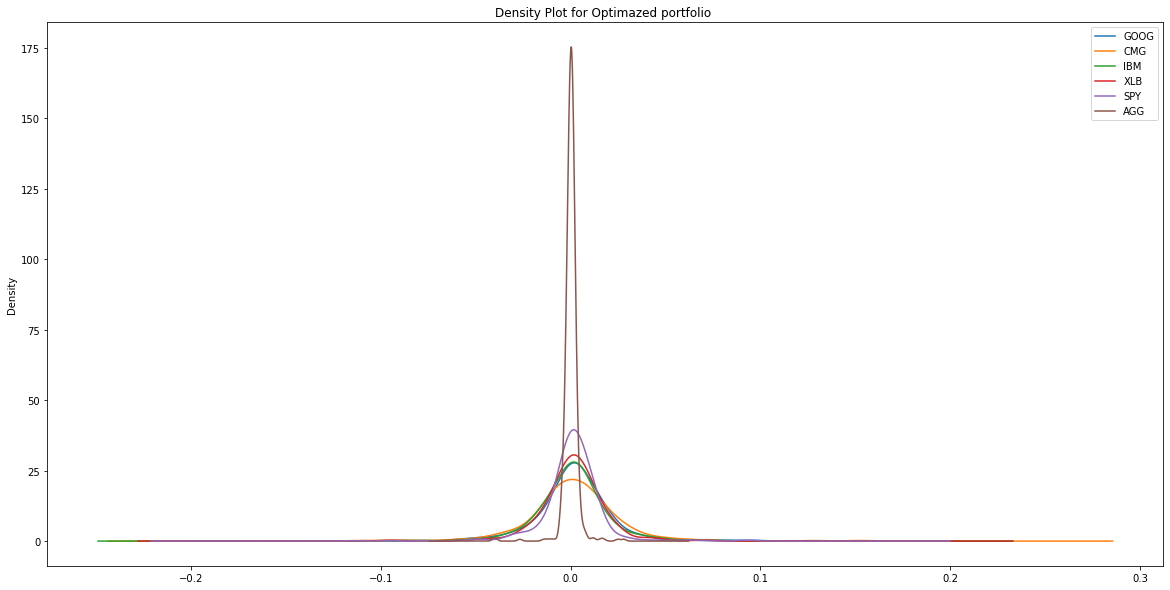

In [22]:
# Visualize the distribution of daily returns data for Optimazed portfolio
# by calling the plot.density function on the daily_returns_df DataFrame.
op_daily_returns.plot.density(figsize= (20,10),title='Density Plot for Optimazed portfolio ')

In [23]:
#Using the default Pandas plot to visualize the cumulative return values for the optimazed portfolio and diversifying stocks over time. 
#portfolio_cumulative_price = (1+portfolio_daily_returns).cumprod()-1
opfolio_cumulative_price = (1+op_daily_returns).cumprod()
opfolio_cumulative_price.head()

GOOG       CMG       IBM       XLB       SPY  \
time                                                                          
2019-05-02 00:00:00-04:00  0.995342  1.028355  0.993384  0.994682  0.998047   
2019-05-03 00:00:00-04:00  1.015104  1.030215  0.997937  1.004609  1.007470   
2019-05-06 00:00:00-04:00  1.018486  1.041066  0.998791  0.990605  1.003529   
2019-05-07 00:00:00-04:00  1.005737  1.026089  0.979014  0.973054  0.986979   
2019-05-08 00:00:00-04:00  0.998133  1.030737  0.981717  0.971991  0.985334   

                                AGG  
time                                 
2019-05-02 00:00:00-04:00  0.997924  
2019-05-03 00:00:00-04:00  0.999631  
2019-05-06 00:00:00-04:00  1.000646  
2019-05-07 00:00:00-04:00  1.002122  
2019-05-08 00:00:00-04:00  1.001661

In [24]:
#optimazed portfolio cumulative price using hvplot function
opfolio_cumulative_price.hvplot(
    figsize=(20,10),
    xlabel="Date",
    ylabel= "portfolio_cumulative_price",
    title= " Optimazed Portfolio Cumulative Price"
)

:NdOverlay   [Variable]
   :Curve   [time]   (value)

### Analyze the Volatility

<AxesSubplot:title={'center':'Daily Returns Client Portfolio '}>

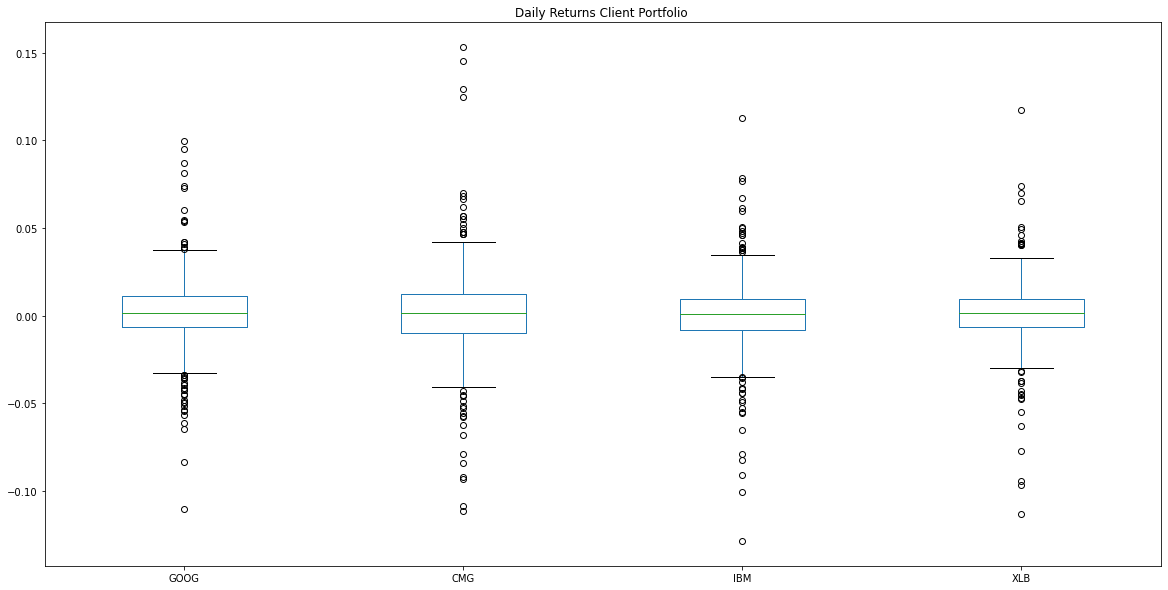

In [25]:
#Use the Pandas plot function and the kind="box" parameter to visualize the daily return data for each of the client portfolios 
client_daily_returns.plot(kind='box', figsize=(20,10), title= 'Daily Returns Client Portfolio ')

<AxesSubplot:title={'center':'Daily Returns Optimazed Portfolio '}>

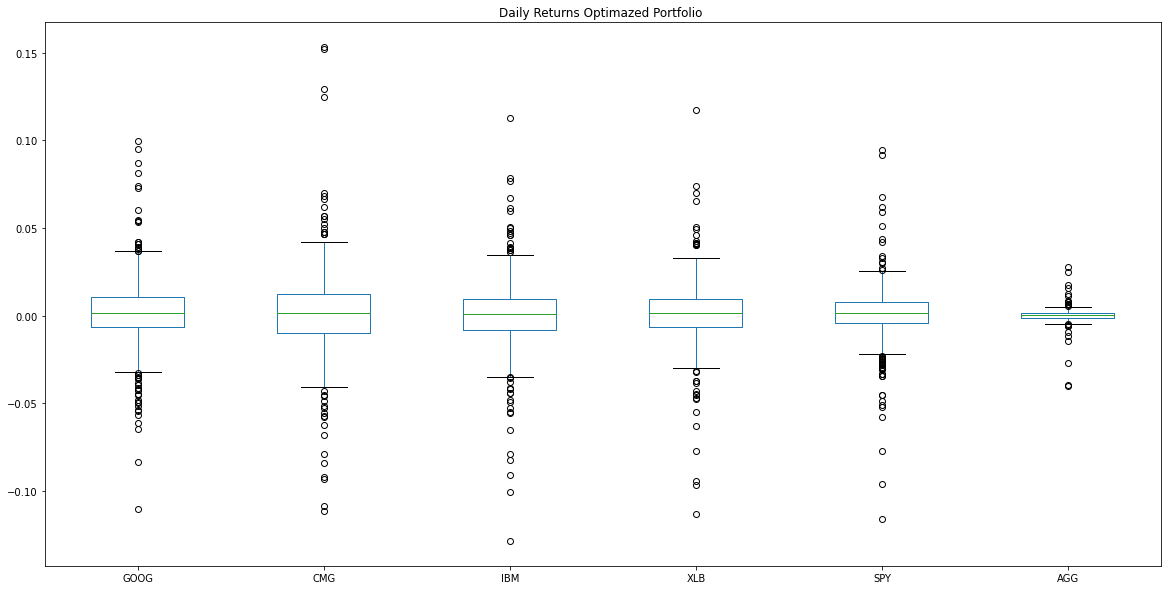

In [26]:
#Use the Pandas plot function and the kind="box" parameter to visualize the daily return data for each of the optimazed portfolios 
op_daily_returns.plot(kind='box', figsize=(20,10), title= 'Daily Returns Optimazed Portfolio ')

<AxesSubplot:title={'center':'Client Cumulative Returns '}>

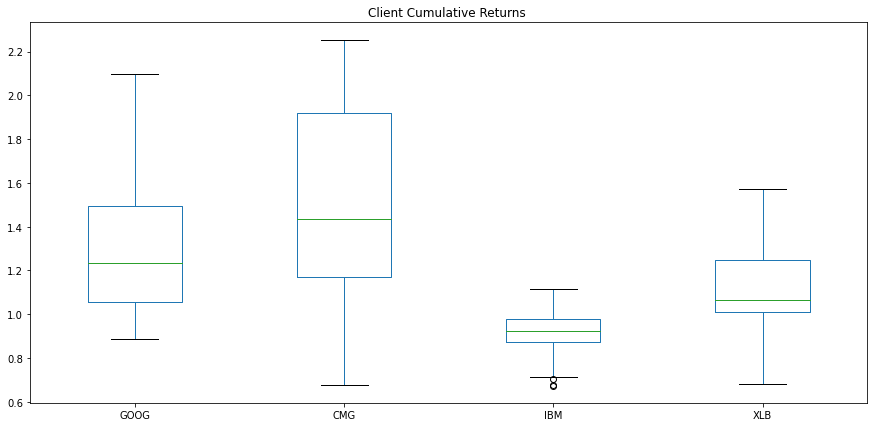

In [27]:
#Visualize the cumulative returns data for just the client portfolios by using another box plot.
cpfolio_cumulative_price.plot(kind='box', figsize=(15,7), title= 'Client Cumulative Returns ')

<AxesSubplot:title={'center':'Optimazed Portfolio Cumulative Returns '}>

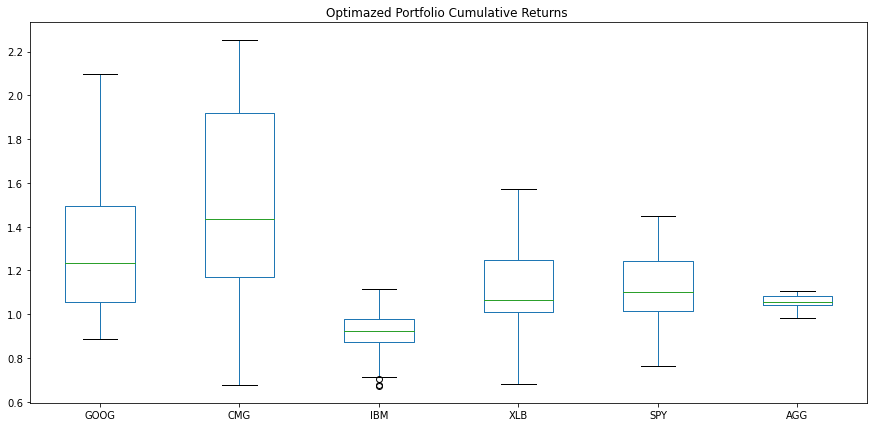

In [28]:
#Visualize the cumulative returns data for just the optimazed portfolios by using another box plot.
opfolio_cumulative_price.plot(kind='box', figsize=(15,7), title= 'Optimazed Portfolio Cumulative Returns ')

In [29]:
#creating client portfolio weights data frame
cpfolio_weights= pd.DataFrame(
    {   "tickers":["CMG", "GOOG", "IBM", "XLB"],
        "weights_1":[0.169679, 0.125242, 0.319732, 0.38547]
        
    }
)
cpfolio_weights.T

0         1         2        3
tickers         CMG      GOOG       IBM      XLB
weights_1  0.169679  0.125242  0.319732  0.38547

In [30]:
#creating optimazed portfolio weights data frame
opfolio_weights= pd.DataFrame(
    {  
        "tickers_2": ["CMG", "GOOG", "IBM", "XLB","AGG","SPY"],
        "weights_2": (0.28, .44, 0, 0,0.25, 0.03),
    }
)
opfolio_weights.T


0     1    2    3     4     5
tickers_2   CMG  GOOG  IBM  XLB   AGG   SPY
weights_2  0.28  0.44  0.0  0.0  0.25  0.03

<AxesSubplot:title={'center':'Client portfolio weights pie chart'}, ylabel='weights_1'>

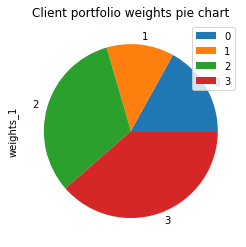

In [31]:
#Client portfolio weights pie chart
cpfolio_weights.plot.pie(y= "weights_1", title= "Client portfolio weights pie chart")

<AxesSubplot:title={'center':'optimaze portfolio weights pie chart'}, ylabel='weights_2'>

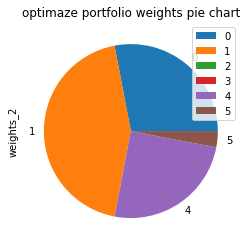

In [32]:
#optimaze portfolio weights pie chart
opfolio_weights.plot.pie(y= "weights_2", title= "optimaze portfolio weights pie chart")

In [33]:
##Usin std function to calculate the standard deviation for each of the client portfolios 
cl_standard_deviation = client_daily_returns.std()
cl_standard_deviation.sort_values(inplace=True)
cl_standard_deviation

XLB     0.018425
GOOG    0.020318
IBM     0.020565
CMG     0.025190
dtype: float64

<AxesSubplot:title={'center':'client portfolio standard deviation'}>

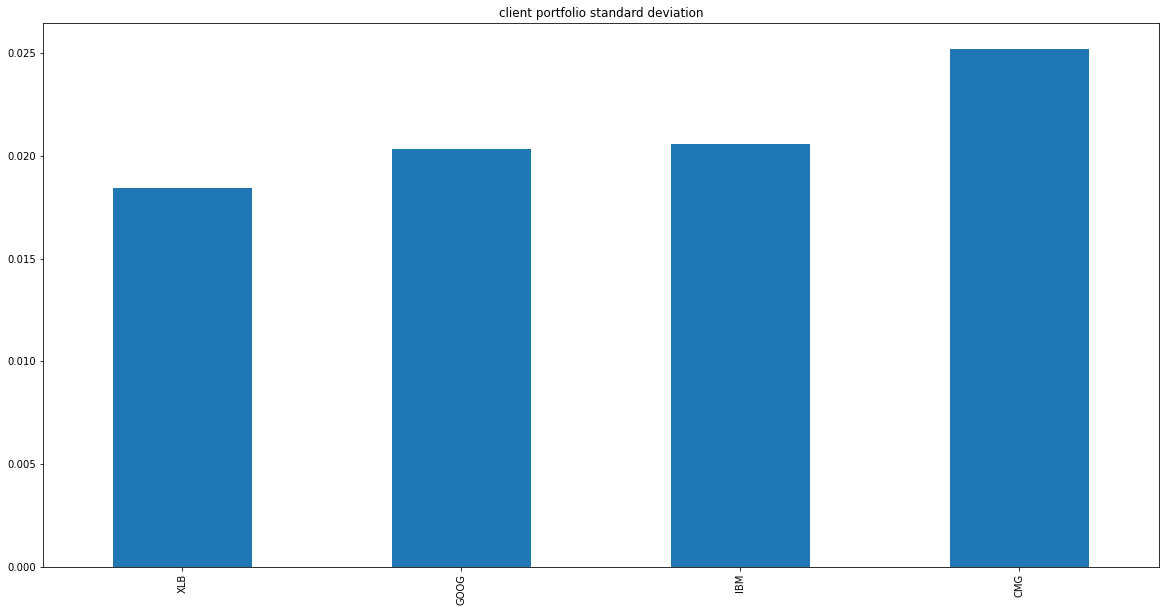

In [34]:
#Using bar plot to visualize standard deviation for each of the client portfolios
cl_standard_deviation.plot.bar(figsize=(20,10),title ='client portfolio standard deviation')

In [35]:
#Use the Pandas std function to calculate the standard deviation for each of the optimazed portfolios 
op_standard_deviation = op_daily_returns.std()
op_standard_deviation.sort_values(inplace=True)
op_standard_deviation

AGG     0.004101
SPY     0.016075
XLB     0.018431
GOOG    0.020322
IBM     0.020565
CMG     0.025268
dtype: float64

<AxesSubplot:title={'center':'optimazed portfolio standard deviation'}>

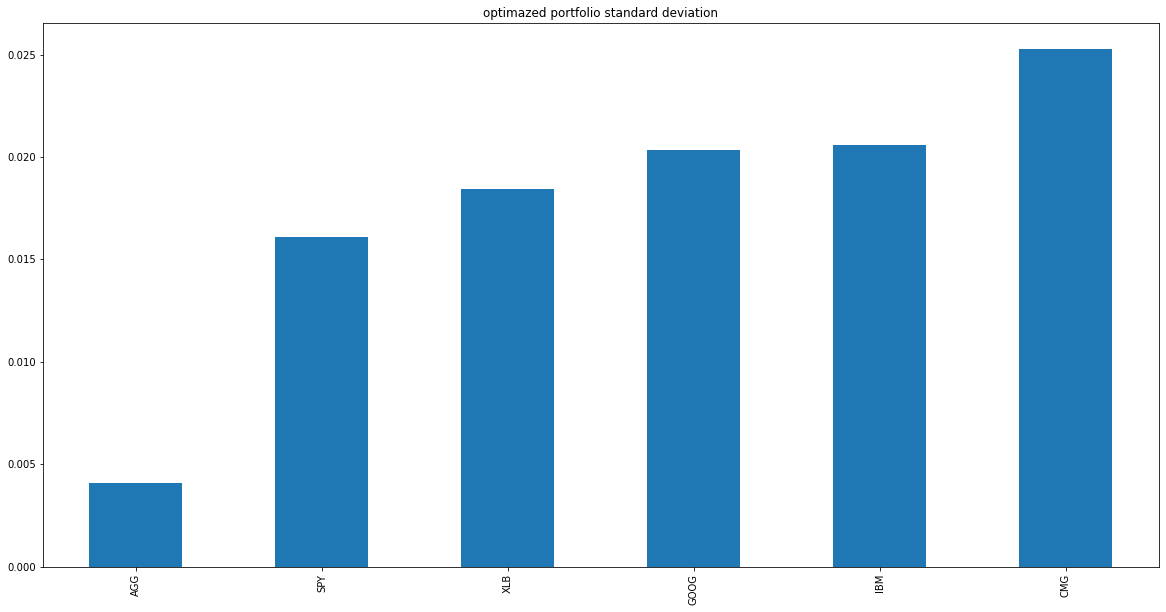

In [36]:
#Using bar plot to visualize standard deviation for each of the optimazed portfolios
op_standard_deviation.plot.bar(figsize=(20,10),title ='optimazed portfolio standard deviation')

In [37]:
# Annual average return of client portfolio
weights_1=[0.169679, 0.125242, 0.319732, 0.38547]
trading_days = 252
cl_annual_average_return = client_daily_returns.mean()*trading_days*weights_1
cl_annual_average_return

GOOG    0.068909
CMG     0.049138
IBM     0.024418
XLB     0.098229
dtype: float64

In [38]:
# Annual average return of optimazed portfolio
weights_2=[0.28, 0.44, 0.00, 0.00, 0.25, 0.03]
trading_days = 252
op_annual_average_return = op_daily_returns.mean()*trading_days*weights_2
op_annual_average_return

GOOG    0.113718
CMG     0.172825
IBM     0.000000
XLB     0.000000
SPY     0.052375
AGG     0.000870
dtype: float64

In [39]:
#Use the Pandas std function to calculate the annualized standard deviation for each of the client portfolios with weights
cl_annualized_standard_deviation= client_daily_returns.std()*np.sqrt(252)*weights_1
cl_annualized_standard_deviation

GOOG    0.054727
CMG     0.050082
IBM     0.104380
XLB     0.112743
dtype: float64

In [40]:
#Use the Pandas std function to calculate the annualized standard deviation for each of the optimazed portfolios with weights
op_annualized_standard_deviation= op_daily_returns.std()*np.sqrt(252)*weights_2
op_annualized_standard_deviation

GOOG    0.090330
CMG     0.176495
IBM     0.000000
XLB     0.000000
SPY     0.063797
AGG     0.001953
dtype: float64

In [41]:
sharpe_ratios = op_annual_average_return/op_annualized_standard_deviation
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios.dropna()

AGG     0.445334
SPY     0.820966
CMG     0.979205
GOOG    1.258918
dtype: float64

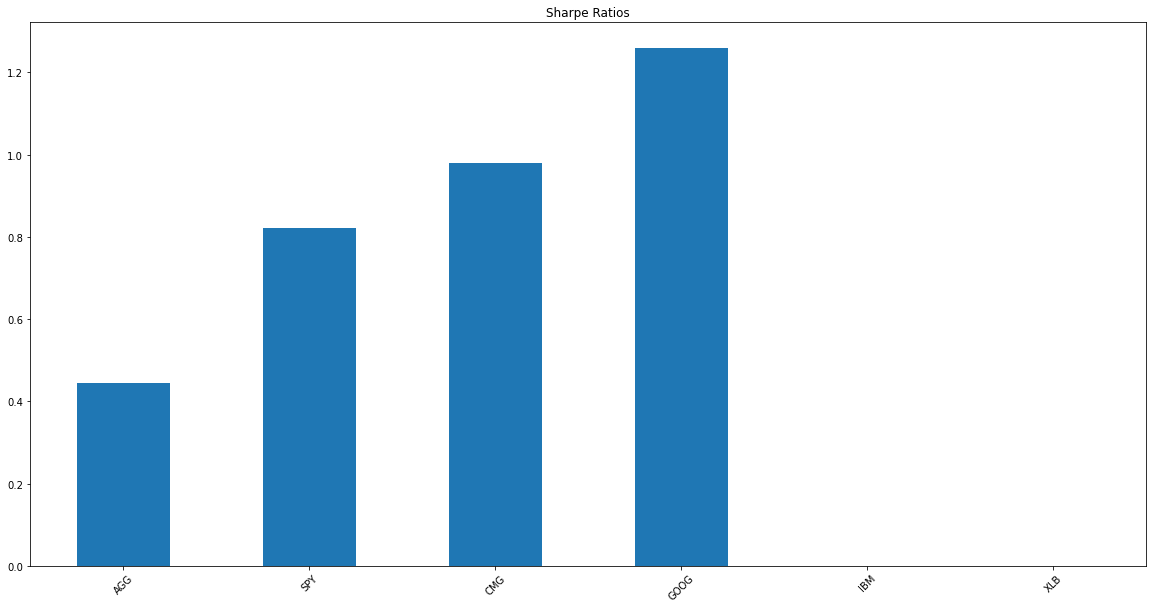

In [42]:
sharpe_ratios.plot.bar(title='Sharpe Ratios', figsize= (20,10),rot=45)
plt.show()

In [43]:
#Client portfolio data frame
client_portfolio_quantities=pd.DataFrame({
    "ticker": ["CMG", "GOOG", "IBM", "XLB"],
    'quantity':[10,20,500,1000],
    'weights_1':[00.169679,0.125242,0.319732,0.385347],
    'type':('equity')})
display(client_portfolio_quantities)


ticker  quantity  weights_1    type
0    CMG        10   0.169679  equity
1   GOOG        20   0.125242  equity
2    IBM       500   0.319732  equity
3    XLB      1000   0.385347  equity

In [44]:
# Current amount of shares  portion of the portfolio.
cmg_shares = 10
goog_shares = 20
ibm_shares=500
xlb_shares=1000



In [45]:
#portfolio_weights which are client portfolio weights(weights_1) and optimized portfolio weiegts(weights_2)
weights_1=[0.169679, 0.125242, 0.319732, 0.38547]
weights_2=[0.28, 0.44, 0.0, 0.0, 0.25, 0.03]
#portfolio_weights= sum(map(float,weights))
#portfolio_weights

In [46]:
#client portfolio weights
cportfolio_weights=np.array(weights_1)
cportfolio_weights

array([0.169679, 0.125242, 0.319732, 0.38547 ])

In [47]:
#calculate daily returns of client portfolio
daily_returns_mean= client_daily_returns.mean().sum()
print(f"original daily returns mean is { daily_returns_mean:.4f}")

original daily returns mean is 0.0045


In [48]:
daily_returns_mean= op_daily_returns.mean().sum()
print(f"daily_returns_mean optimized daily returns mean is {daily_returns_mean:.4f}")

daily_returns_mean optimized daily returns mean is 0.0054


In [49]:
#calculate expected annual return of client portfolio
cl_expected_annual_return = np.sum(client_daily_returns.mean() * cportfolio_weights) * 252
print(f"client expected annual return is {cl_expected_annual_return:.5f}")

client expected annual return is 0.24069


In [50]:
# using Portfolio variance function to calculate variance of client portfolio 
cpfolio_var = np.dot(cportfolio_weights, np.dot(client_daily_returns.cov() * 252, cportfolio_weights.T))
print(f"client portfolio variance is {cpfolio_var:.4f}")

client portfolio variance is 0.0720


In [51]:
#calculate expected annual return of client portfolio
cl_expected_annual_return = np.sum(client_daily_returns.mean() * cportfolio_weights) * 252
print(f"client expected annual return is {cl_expected_annual_return:.4f}")

client expected annual return is 0.2407


In [52]:
#client plotfolio volatility
cl_portfolio_volatility = np.sqrt(cpfolio_var)
print(f"Client portfolio volatility is {cl_portfolio_volatility:.4f}")

Client portfolio volatility is 0.2684


In [53]:
#calculate mean daily returns of optimized portfolio
cl_daily_returns_mean=client_daily_returns.mean().sum()
print(f"client portfolio daily returns mean is {cl_daily_returns_mean:.4f}")

client portfolio daily returns mean is 0.0045


In [54]:
#Display optimazed portfolio_weights
portfolio_weights = np.array(weights_2)
portfolio_weights

array([0.28, 0.44, 0.  , 0.  , 0.25, 0.03])

In [55]:
#optimazed portfolio weights transposs
portfolio_weights.T

array([0.28, 0.44, 0.  , 0.  , 0.25, 0.03])

In [56]:
#calculate mean daily returns of optimized portfolio
op_daily_returns_mean=op_daily_returns.mean().sum()
print(f"optimazed daily returns mean is {op_daily_returns_mean:.4f}")

optimazed daily returns mean is 0.0054


In [57]:
#calculate expected annual return of optimazed portfolio
op_expected_annual_return = np.sum(op_daily_returns.mean() * portfolio_weights) * 252
print(f"optimazed expected annual return is {op_expected_annual_return:.4f}")

optimazed expected annual return is 0.3398


In [60]:
# Portfolio variance calc
opfolio_var = np.dot(portfolio_weights, np.dot(op_daily_returns.cov() * 252, portfolio_weights.T))
print(f"optimazed portfolio variance is {opfolio_var:.4f}")

optimazed portfolio variance is 0.0815


In [ ]:
#client plotfolio volatility
op_portfolio_volatility = np.sqrt(opfolio_var)
print(f"optimazed portfolio volatility is {op_portfolio_volatility:.4f}")

In [ ]:
def correlation(equity_list):  
    
    client_prices_df = pd. DataFrame()
    equity_columns = []
    
    # Get symbol history
    for tickers in equity_list:   
        try:
            tickers_df = get_bars(tickers)
            client_prices_df = pd.concat([client_prices_df, tickers_df], axis=1)
            equity_columns.append('close')
        except:
            print('Exception with {}'.format('close'))
            
    client_prices_df.columns['close'] = equity_columns['close']
    
    # Get correlation and sort by sum
    sum_corr = client_prices_df.corr().sum().sort_values(ascending=True).index.values
    
    return client_prices_df[sum_corr].corr()


In [ ]:
#client portfolio closing price
client_prices_df2 = client_prices_df[[('CMG', 'close'),
 ('GOOG', 'close'),
 ('IBM', 'close'),
 ('XLB', 'close')]]

client_prices_df2.head()

In [ ]:
#The Client portfolio correlation function
sum_corr = client_prices_df2.corr().sum().sort_values(ascending=True).index.values
#dispay portfolio correlation 
pfolio_corr = client_prices_df2.corr()
pfolio_corr.head()

In [ ]:
#The Client portfolio correlation function
sum_corr = prices_df.corr().sum().sort_values(ascending=True).index.values
#dispay portfolio correlation 
pfolio_corr = prices_df.corr()
pfolio_corr.head()

In [ ]:
#optimized portfolio volatility
op_portfolio_volatility = np.sqrt(pfolio_var)
print(f"Optimized portfolio_volatility is {op_portfolio_volatility:.4f}")

In [ ]:
#Client portfolio Sharpe Ratio (annual) (Assumed risk_free_rate=0) 
risk_free_rate_annualized=0
sharpe_ratio = (cl_expected_annual_return - risk_free_rate_annualized)/cl_portfolio_volatility
print(f"Client portfolio sharpe ratio is {sharpe_ratio:.4f}")

In [ ]:
#Client portfolio Sharpe Ratio (annual) (Assumed risk_free_rate=0) 
risk_free_rate_annualized=0
sharpe_ratio = (op_expected_annual_return - risk_free_rate_annualized)/op_portfolio_volatility
print(f"optimized portfolio sharpe ratio is {sharpe_ratio:.4f}")

# Comprison Between Client Portfolio and Optimazed Portfolio

In [ ]:
client_portfolio=pd.DataFrame({
    "cl_daily_returns_mean": [0.0045],
    'cl_daily_returns_mean':[0.0054],
    'cl_expected_annual_return':[0.2408],
    'client_portfolio_variance':[0.0722],
    'client_portfolio_volatility':[0.2686],
    'client_portfolio_sharpe_ratio':[0.8963]

})
client_portfolio.plot.bar(figsize=(20,10))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
w=0.4
stocks=["CMG","GOOG","IBM","XLB","AGG","SPY"]
client_expected_annual_returns=[0.049138, 0.068909,0.024418,0.098229,0.000000,0.000000 ]
optimazed_expected_annual_returns=[0.172633,0.113710, 0.000000,0.000000,0.000870,0.052375]
bar1=np.arange(len(portfolio))
bar2=[i+w for i in bar1]
plt.bar(bar1,client_expected_annual_returns,w,label="Client Expected Annual Returns each stock contribution")
plt.bar(bar2,optimazed_expected_annual_returns,w,label="Optimazed Expected Annual Returns each stock contribution")
plt.xlabel("portfolio")
plt.ylabel("expected annual returns of each stock contribution")
plt.title("client portfolio Vs optimazed portfolio")
plt.xticks(bar1,portfolio)
plt.figsize=(20,10)
plt.legend()
plt.show()

# DATA VISUALIZATION SUMMARY

In [ ]:
# Calculating daily return for a 1 year period
daily_returns_1_year = client_daily_returns.loc["2019-05-01":"2020-05-01"]

# Display 1 year return statistics
daily_returns_1_year.describe()

# Calculating daily return for a 3 year period
#daily_returns_3_year = client_daily_returns.loc["2019-05-01":"2021-05-01"]

# Display 3 year return statistics
#daily_returns_3_year.describe()

In [ ]:
# Calculating daily return for a 3 year period
daily_returns_3_year = client_daily_returns.loc["2019-05-01":"2021-05-01"]

# Display 3 year return statistics
daily_returns_3_year.describe()

## Plotting Daily Returns

In [ ]:
#plotig daily returns the 1-year period from 2019-05-01 to 2020-05-01
daily_returns_1_year.plot(figsize=(20,10), title=' daily returns the 1-year period ')

In [ ]:
#plotig daily returns the 3-year period from 2019-05-01 to 2021-05-01
daily_returns_3_year.plot(figsize=(20,10), title=' daily returns the 3-year period ')

### Plotting cumulative Returns

In [ ]:
#cumulative returns of the 1-year from period 2019-05-01 to 2020-05-01
cumulative_returns_1_year=(1+daily_returns_1_year).cumprod()
cumulative_returns_1_year.head()

In [ ]:
#plotig cumulative returns of the 1-year period from 2019-05-01 to 2021-05-01
cumulative_returns_1_year.plot(figsize=(20,10),title='cumulative returns of the 1-year period')

In [ ]:
#cumulative returns of the 3-year from period 2019-05-01 to 2020-05-01
cumulative_returns_3_year=(1+daily_returns_3_year).cumprod()
cumulative_returns_3_year.head()

In [ ]:
cumulative_returns_3_year.plot(figsize=(20,10),title='cumulative returns of the 3-year period')

#### plotting sharpe ratios and standard deviation


In [ ]:
standard_deviation = client_daily_returns.std()
standard_deviation

In [ ]:
# plotting standard deviation using bar plot
standard_deviation.sort_values(inplace=True) 
standard_deviation.plot.bar(figsize=(20,10))

In [ ]:
#calculating and dropna sharpe ratios using bar plot
sharpe_ratios = cl_annual_average_return/cl_annualized_standard_deviation
sharpe_ratios.sort_values(inplace=True)
sharpe_ratios.dropna()

In [ ]:
#ploting sharpe ratios using bar plot
sharpe_ratios.plot.bar(figsize=(20,10), title = 'sharpe ratios of portfolio')